In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from matplotlib import cm

Считываем датасет и отделяем целевую переменную от выборки.

In [2]:
data = pd.read_csv('/kaggle/input/lab2-ml-dataset/housing.csv', header=None,delimiter='\s+')
X = data[range(13)]
y = data[13]

Сначала рассмотрим поведение при выкидывании признаков. Будем оставлять только первые N столбцов (N будет четным) и для каждого полученного случая измерять ошибку. В качестве метрик будем использовать MSE, MAE и R2. 

In [3]:
mses = []
maes = []
r2s = []
num_features = list(range(2, 13, 2))
lr = LinearRegression()
for i in num_features:
    X_left = X[range(i)]
    lr.fit(X_left, y)
    y_pred = lr.predict(X_left)
    mses.append(mean_squared_error(y, y_pred))
    maes.append(mean_absolute_error(y, y_pred))
    r2s.append(r2_score(y, y_pred))

Построим графики зависимости ошибок от количества признаков

Text(0, 0.5, 'MSE')

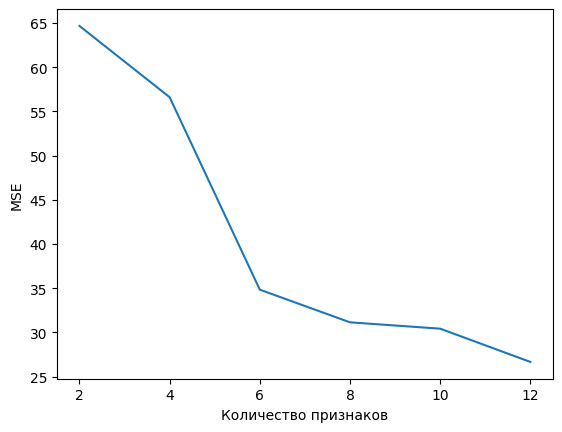

In [4]:
plt.plot(num_features, mses)
plt.xlabel("Количество признаков")
plt.ylabel("MSE")

Text(0, 0.5, 'MAE')

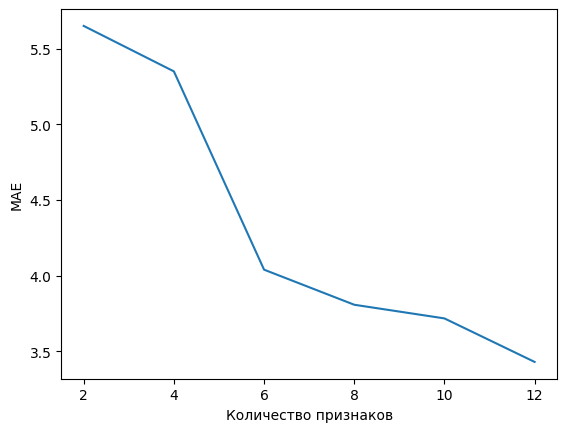

In [5]:
plt.plot(num_features, maes)
plt.xlabel("Количество признаков")
plt.ylabel("MAE")

Text(0, 0.5, 'R2')

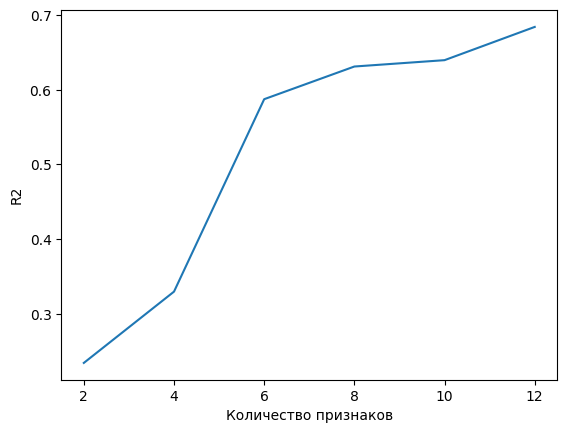

In [6]:
plt.plot(num_features, r2s)
plt.xlabel("Количество признаков")
plt.ylabel("R2")

Таким образом мы видим, что качество модели увеличивается с ростом признаков. В случае MSE и MAE ошибка уменьшается, а в случае R2 метрика растет.

Теперь исследуем зависимость от количества элементов в выборке. Будем оставлять только первые N элементов, где N будет меняться с шагом 100.

In [7]:
mses = []
maes = []
r2s = []
lr = LinearRegression()
num_samples = list(range(100, X.shape[0], 100))
for samples in num_samples:
    X_left = X[:samples]
    y_left = y[:samples]
    lr.fit(X_left, y_left)
    y_pred = lr.predict(X_left)
    mses.append(mean_squared_error(y_left, y_pred))
    maes.append(mean_absolute_error(y_left, y_pred))
    r2s.append(r2_score(y_left, y_pred))

Построим графики зависимости ошибок от количества данных

Text(0, 0.5, 'MSE')

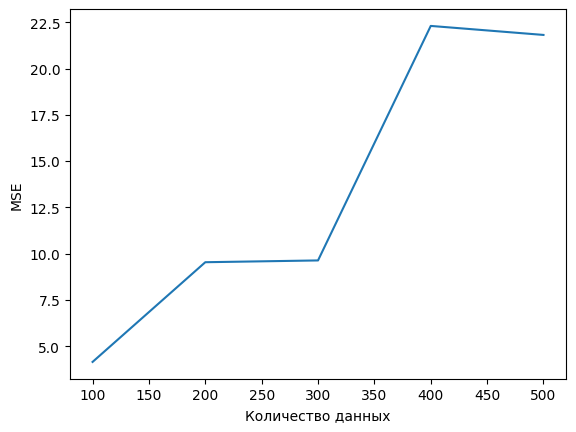

In [8]:
plt.plot(num_samples, mses)
plt.xlabel("Количество данных")
plt.ylabel("MSE")

Text(0, 0.5, 'MAE')

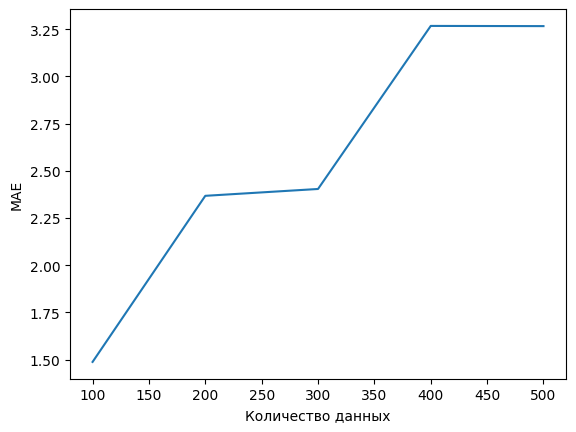

In [9]:
plt.plot(num_samples, maes)
plt.xlabel("Количество данных")
plt.ylabel("MAE")

Text(0, 0.5, 'R2')

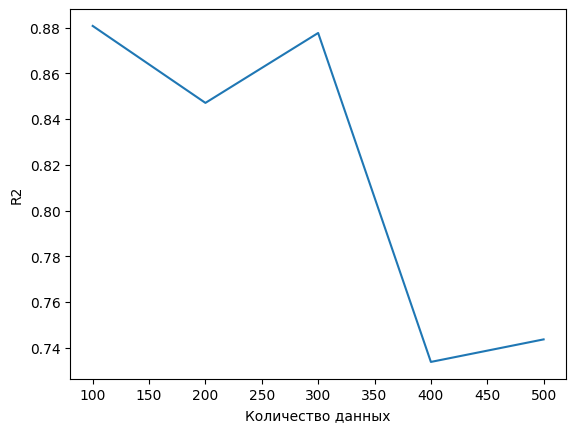

In [10]:
plt.plot(num_samples, r2s)
plt.xlabel("Количество данных")
plt.ylabel("R2")

Получилось также, что качество модели увеличивается с ростом числа элементов. При этом при приближении к максимальному числу признаков качество перестает расти, и даже немного ухудшается. Видимо это связано, с тем что признаков становится слишком много и модели становится тяжелее линейно под них подстроиться.

Теперь оставим только первые два признака в выборке, обучим на них линейную регриссию. Отобразим данные и полученную плоскость решения на трехмерном рисунке

Text(0.5, 0, 'Целевая переменная')

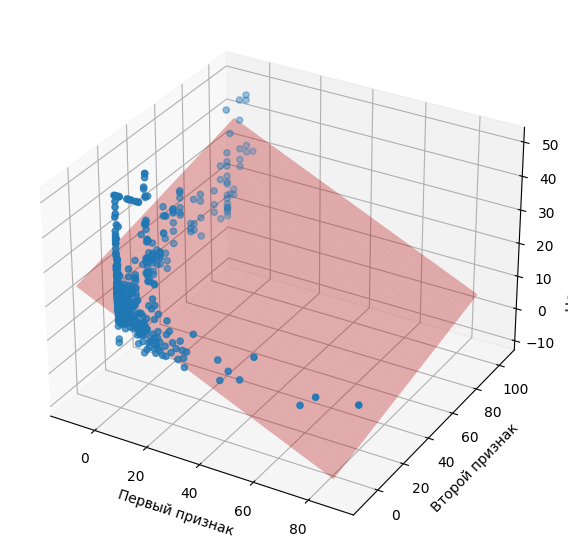

In [17]:
X_left = X[range(2)]
lr.fit(X_left, y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_left[0], X_left[1], y)

X_plot, Y_plot = np.meshgrid(np.arange(-10, 90, 5), np.arange(-10, 110, 5))
Z_plot = lr.predict(np.stack((X_plot, Y_plot), axis=2).reshape(480,2 )).reshape(24, 20)
ax.plot_surface(X_plot, Y_plot, Z_plot, color='r', alpha=0.3)

ax.set_xlabel("Первый признак")
ax.set_ylabel("Второй признак")
ax.set_zlabel("Целевая переменная")